In [457]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [397]:
#Election data from https://github.com/tonmcg/US_County_Level_Election_Results_08-16
#Alaska data supplemnted form here" https://www.thecinyc.com/alaska-pres-results-by-county-equiv
election_csv = pd.read_csv("2016_US_County_Level_Presidential_Results.csv")
#Corna virus data from 1/7/2020 https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
pop_csv = pd.read_csv("covid_county_population_usafacts.csv")
case_csv = pd.read_csv("covid_confirmed_usafacts.csv")


In [398]:
election_csv.head(5)

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,93003,130413,246588,0.377159,0.52887,"37,410",24.30%,AK,Aleutians East Borough,2013
1,93003,130413,246588,0.377159,0.52887,"37,410",24.10%,AK,Aleutians West Census Area,2016
2,93003,130413,246588,0.377159,0.52887,"37,410",5.40%,AK,Municipality of Anchorage,2020
3,93003,130413,246588,0.377159,0.52887,"37,410",32.60%,AK,Bethel Census Area,2050
4,93003,130413,246588,0.377159,0.52887,"37,410",29.00%,AK,Bristol Bay Borough,2060


In [399]:
pop_csv

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [400]:
case_csv.head(5)

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,442,453,469,479,488,498,503,527,537,553
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,437,450,464,477,515,555,575,643,680,703
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,277,280,288,305,312,317,317,322,325,326
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,129,135,141,149,153,161,162,165,170,174


In [401]:
l1=set(pop_csv['countyFIPS'])
l2 = set(election_csv['combined_fips'])
l2_dif = l2.difference(l1)
l1_dif =l1.difference(l2)

In [402]:
#whats in election thast not in cases or pop
election_csv[election_csv.combined_fips.isin(l2_dif)]

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
2411,2504,241,2896,0.864641,0.083218,"2,263",78.14%,SD,Oglala County,46113


In [403]:
#whats in cases not in election
pop_csv[pop_csv.countyFIPS.isin(l1_dif)]


,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
68,0,Statewide Unallocated,AK,0
83,2158,Kusilvak Census Area,AK,8314
99,0,Statewide Unallocated,AZ,0
115,0,Statewide Unallocated,AR,0
191,0,Statewide Unallocated,CA,0
192,6000,Grand Princess Cruise Ship,CA,0
251,0,Statewide Unallocated,CO,0
316,0,Statewide Unallocated,CT,0
325,0,Statewide Unallocated,DE,0


In [404]:
# I'm going to ignore Kusilvak Census Area and Kalawao County becaseu I'm not sure how they were counted in the election. But I can change Oglala Lakota County FIPS 
pop_csv.at[2456,'countyFIPS'] = election_csv.iloc[2411]['combined_fips'] 

In [405]:
#merge county name on election and cases pbased on FIPS
merge_pop = pd.merge(pop_csv[['countyFIPS','County Name','population']],election_csv[['county_name','combined_fips']],how='inner',left_on=['countyFIPS'],right_on=['combined_fips'])
merge_pop.set_index('countyFIPS')
merge_pop.drop(columns = ['combined_fips'])
merge_pop

,countyFIPS,County Name,population,county_name,combined_fips
0,1001,Autauga County,55869,Autauga County,1001
1,1003,Baldwin County,223234,Baldwin County,1003
2,1005,Barbour County,24686,Barbour County,1005
3,1007,Bibb County,22394,Bibb County,1007
4,1009,Blount County,57826,Blount County,1009
...,...,...,...,...,...
3136,56037,Sweetwater County,42343,Sweetwater County,56037
3137,56039,Teton County,23464,Teton County,56039
3138,56041,Uinta County,20226,Uinta County,56041
3139,56043,Washakie County,7805,Washakie County,56043


In [406]:
#find ones where the Election county name is mistaches the case county name
merge_pop[merge_pop['County Name'] != merge_pop['county_name']]

,countyFIPS,County Name,population,county_name,combined_fips
251,8014,Broomfield County and City,70465,Broomfield County,8014
319,11001,Washington,705749,District of Columbia,11001
1215,24510,Baltimore City,593490,Baltimore city,24510
1349,27073,Lac Qui Parle County,6623,Lac qui Parle County,27073
1529,29095,Jackson County (including other portions of Ka...,703011,Jackson County,29095
1596,29510,City of St. Louis,300576,St. Louis city,29510
1801,35013,Doña Ana County,218195,Dona Ana County,35013
2411,46113,Oglala Lakota County,14177,Oglala County,46113
2875,51115,Matthews County,8834,Mathews County,51115
2914,51510,Alexandria City,159428,Alexandria city,51510


In [407]:
#change DC's name to avoid poteinal confucsion
merge_pop.at[319,'County Name'] = merge_pop.iloc[319]['county_name'] 
merge_pop.iloc[319]
del merge_pop['county_name']
#Rest of the names we're going by 'County Name'

In [408]:
merge_pop

,countyFIPS,County Name,population,combined_fips
0,1001,Autauga County,55869,1001
1,1003,Baldwin County,223234,1003
2,1005,Barbour County,24686,1005
3,1007,Bibb County,22394,1007
4,1009,Blount County,57826,1009
...,...,...,...,...
3136,56037,Sweetwater County,42343,56037
3137,56039,Teton County,23464,56039
3138,56041,Uinta County,20226,56041
3139,56043,Washakie County,7805,56043


In [409]:
election_csv

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,93003,130413,246588,0.377159,0.528870,"37,410",24.30%,AK,Aleutians East Borough,2013
1,93003,130413,246588,0.377159,0.528870,"37,410",24.10%,AK,Aleutians West Census Area,2016
2,93003,130413,246588,0.377159,0.528870,"37,410",5.40%,AK,Municipality of Anchorage,2020
3,93003,130413,246588,0.377159,0.528870,"37,410",32.60%,AK,Bethel Census Area,2050
4,93003,130413,246588,0.377159,0.528870,"37,410",29.00%,AK,Bristol Bay Borough,2060
...,...,...,...,...,...,...,...,...,...,...
3136,3233,12153,16661,0.194046,0.729428,"8,920",53.54%,WY,Sweetwater County,56037
3137,7313,3920,12176,0.600608,0.321945,"3,393",27.87%,WY,Teton County,56039
3138,1202,6154,8053,0.149261,0.764187,"4,952",61.49%,WY,Uinta County,56041
3139,532,2911,3715,0.143203,0.783580,"2,379",64.04%,WY,Washakie County,56043


In [410]:
#merge the county names and removed uplicate columns
election_merge =  pd.merge(merge_pop,election_csv,how='inner',left_on=['countyFIPS'],right_on=['combined_fips'])
election_merge['winner'] = np.where(election_merge.per_dem > election_merge.per_gop,'Clinton','Trump')
election_merge = election_merge.drop(columns=['county_name','votes_dem','votes_gop','total_votes','per_dem','per_gop','diff','combined_fips_x','combined_fips_y'])
del pop_csv
del election_csv
del merge_pop
election_merge

,countyFIPS,County Name,population,per_point_diff,state_abbr,winner
0,1001,Autauga County,55869,49.48%,AL,Trump
1,1003,Baldwin County,223234,57.79%,AL,Trump
2,1005,Barbour County,24686,5.61%,AL,Trump
3,1007,Bibb County,22394,55.54%,AL,Trump
4,1009,Blount County,57826,81.38%,AL,Trump
...,...,...,...,...,...,...
3136,56037,Sweetwater County,42343,53.54%,WY,Trump
3137,56039,Teton County,23464,27.87%,WY,Clinton
3138,56041,Uinta County,20226,61.49%,WY,Trump
3139,56043,Washakie County,7805,64.04%,WY,Trump


In [411]:
#final merging and deltign unesscary tables
final =  pd.merge(election_merge,case_csv,how='inner',on = ['countyFIPS','County Name'])
final = final.drop(columns=['state_abbr','stateFIPS'])
del election_merge
del case_csv
final.to_csv('combined.csv', sep=',')
final


,countyFIPS,County Name,population,per_point_diff,winner,State,1/22/20,1/23/20,1/24/20,1/25/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,1001,Autauga County,55869,49.48%,Trump,AL,0,0,0,0,...,442,453,469,479,488,498,503,527,537,553
1,1003,Baldwin County,223234,57.79%,Trump,AL,0,0,0,0,...,437,450,464,477,515,555,575,643,680,703
2,1005,Barbour County,24686,5.61%,Trump,AL,0,0,0,0,...,277,280,288,305,312,317,317,322,325,326
3,1007,Bibb County,22394,55.54%,Trump,AL,0,0,0,0,...,129,135,141,149,153,161,162,165,170,174
4,1009,Blount County,57826,81.38%,Trump,AL,0,0,0,0,...,153,159,168,176,184,188,189,199,208,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,56037,Sweetwater County,42343,53.54%,Trump,WY,0,0,0,0,...,56,58,65,73,80,81,82,86,89,89
3134,56039,Teton County,23464,27.87%,Clinton,WY,0,0,0,0,...,111,113,113,118,119,119,123,128,129,134
3135,56041,Uinta County,20226,61.49%,Trump,WY,0,0,0,0,...,148,152,157,162,166,167,168,174,176,177
3136,56043,Washakie County,7805,64.04%,Trump,WY,0,0,0,0,...,39,39,39,39,39,39,39,39,39,39


In [412]:
#final = pd.read_csv('combined.csv')

In [413]:
#split data in to frames for use later
cases = final.iloc[:,6:]
info = final.iloc[:,0:6]
pop = pd.DataFrame(final.population)

In [414]:
info.per_point_diff =  info.per_point_diff.apply(lambda x: float(x.strip('%'))) 
info

,countyFIPS,County Name,population,per_point_diff,winner,State
0,1001,Autauga County,55869,49.48,Trump,AL
1,1003,Baldwin County,223234,57.79,Trump,AL
2,1005,Barbour County,24686,5.61,Trump,AL
3,1007,Bibb County,22394,55.54,Trump,AL
4,1009,Blount County,57826,81.38,Trump,AL
...,...,...,...,...,...,...
3133,56037,Sweetwater County,42343,53.54,Trump,WY
3134,56039,Teton County,23464,27.87,Clinton,WY
3135,56041,Uinta County,20226,61.49,Trump,WY
3136,56043,Washakie County,7805,64.04,Trump,WY


In [415]:
day_increase = cases.diff(axis=1)
day_increase

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,11.0,16.0,10.0,9.0,10.0,5.0,24.0,10.0,16.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,13.0,14.0,13.0,38.0,40.0,20.0,68.0,37.0,23.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,8.0,17.0,7.0,5.0,0.0,5.0,3.0,1.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,6.0,8.0,4.0,8.0,1.0,3.0,5.0,4.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,9.0,8.0,8.0,4.0,1.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,7.0,8.0,7.0,1.0,1.0,4.0,3.0,0.0
3134,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,5.0,1.0,0.0,4.0,5.0,1.0,5.0
3135,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,4.0,5.0,5.0,4.0,1.0,1.0,6.0,2.0,1.0
3136,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [463]:
#get increases per day (no normlisation)
increases = pd.concat([info,day_increase],axis =1)
increases = increases.drop(columns=['1/22/20'])
increases

,countyFIPS,County Name,population,per_point_diff,winner,State,1/23/20,1/24/20,1/25/20,1/26/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,1001,Autauga County,55869,49.48,Trump,AL,0.0,0.0,0.0,0.0,...,8.0,11.0,16.0,10.0,9.0,10.0,5.0,24.0,10.0,16.0
1,1003,Baldwin County,223234,57.79,Trump,AL,0.0,0.0,0.0,0.0,...,7.0,13.0,14.0,13.0,38.0,40.0,20.0,68.0,37.0,23.0
2,1005,Barbour County,24686,5.61,Trump,AL,0.0,0.0,0.0,0.0,...,5.0,3.0,8.0,17.0,7.0,5.0,0.0,5.0,3.0,1.0
3,1007,Bibb County,22394,55.54,Trump,AL,0.0,0.0,0.0,0.0,...,2.0,6.0,6.0,8.0,4.0,8.0,1.0,3.0,5.0,4.0
4,1009,Blount County,57826,81.38,Trump,AL,0.0,0.0,0.0,0.0,...,4.0,6.0,9.0,8.0,8.0,4.0,1.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,56037,Sweetwater County,42343,53.54,Trump,WY,0.0,0.0,0.0,0.0,...,3.0,2.0,7.0,8.0,7.0,1.0,1.0,4.0,3.0,0.0
3134,56039,Teton County,23464,27.87,Clinton,WY,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,5.0,1.0,0.0,4.0,5.0,1.0,5.0
3135,56041,Uinta County,20226,61.49,Trump,WY,0.0,0.0,0.0,0.0,...,10.0,4.0,5.0,5.0,4.0,1.0,1.0,6.0,2.0,1.0
3136,56043,Washakie County,7805,64.04,Trump,WY,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [464]:
#melt tables for graphing
increases = increases.melt(id_vars=['countyFIPS','County Name','per_point_diff','winner','State','population'],
                var_name='Date',value_name='Day Increase')
increases.Date = pd.to_datetime(increases.Date)
increases                                

,countyFIPS,County Name,per_point_diff,winner,State,population,Date,Day Increase
0,1001,Autauga County,49.48,Trump,AL,55869,2020-01-23,0.0
1,1003,Baldwin County,57.79,Trump,AL,223234,2020-01-23,0.0
2,1005,Barbour County,5.61,Trump,AL,24686,2020-01-23,0.0
3,1007,Bibb County,55.54,Trump,AL,22394,2020-01-23,0.0
4,1009,Blount County,81.38,Trump,AL,57826,2020-01-23,0.0
...,...,...,...,...,...,...,...,...
505213,56037,Sweetwater County,53.54,Trump,WY,42343,2020-07-01,0.0
505214,56039,Teton County,27.87,Clinton,WY,23464,2020-07-01,5.0
505215,56041,Uinta County,61.49,Trump,WY,20226,2020-07-01,1.0
505216,56043,Washakie County,64.04,Trump,WY,7805,2020-07-01,0.0


In [497]:
#remove data from pre March -1
#increases = increases[increases.Date >= datetime(2020,3,1)]
max_pop = max(increases['population'])


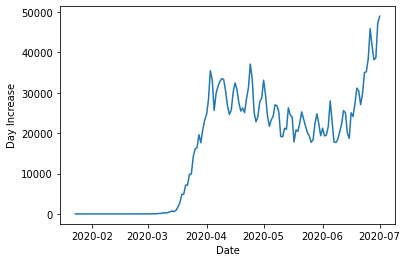

In [473]:
#Just general increases in America
sns.lineplot(x="Date", y="Day Increase", data=increases.groupby(['Date'],as_index = False)[['Day Increase']].sum())


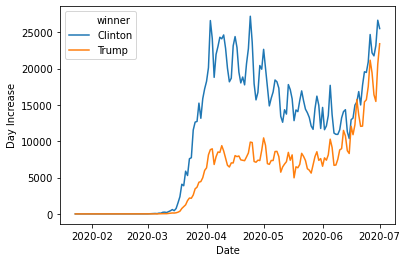

In [474]:
#Just increase by winner
sns.lineplot(x="Date", y="Day Increase",hue = 'winner', data=increases.groupby(['Date','winner'],as_index = False)[['Day Increase']].sum())

In [515]:
increases.groupby(['Date','winner'],as_index = False).apply(lambda x: (x['Day Increase']*x['population']/max_pop).sum()).to_frame().reset_index().rename(columns= {0: 'weighted_sum'})


,Date,winner,weighted_sum
0,2020-01-23,Clinton,0.000000
1,2020-01-23,Trump,0.000000
2,2020-01-24,Clinton,0.513017
3,2020-01-24,Trump,0.000000
4,2020-01-25,Clinton,0.000000
...,...,...,...
317,2020-06-29,Trump,577.195921
318,2020-06-30,Clinton,6515.862203
319,2020-06-30,Trump,2023.145815
320,2020-07-01,Clinton,5345.853574


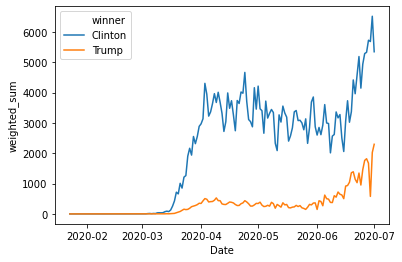

In [517]:
#Just increase by winner
sns.lineplot(x="Date", y="weighted_sum",hue = 'winner', data= increases.groupby(['Date','winner'],as_index = False).apply(lambda x: (x['Day Increase']*x['population']/max_pop).sum()).to_frame().reset_index().rename(columns= {0: 'weighted_sum'})
 )